In [1]:
import math
# calculus
import sympy as sym
import random
import matplotlib.pyplot as plt
import numpy as np

# Analytical (Geometric)

In [8]:
# Pr is the ratio for P1/P2 (when Capture ratio is 3, Pr is sqrt(2))
CR_list = [1.5, 3, 6]

Pr_list = [10 ** (x / 10) for x in CR_list]

# pathloss expo
gamma = 3

x, y= sym.symbols('x y')

# Px_list is the transmit power of x, have 4 levels
Px_list = [1, 2, 4, 8]
# Py_list is the transmit power of y, have 4 levels
Py_list = [1, 2, 4, 8]

result_ana = [0, 0, 0]
draw_ana = [[], [], []]
# total is the Accumulate probability for not being capture (need to divide by all possibilities)
# 3 scenario for geometric method
for idx, Pr in enumerate(Pr_list):
    total = 0
    result = 0
    for Px in Px_list:
        for Py in Py_list:
            # Calculate the slope for 2 lines so that we can know which scenario
#             slope_1 = math.sqrt(Py * Pr / Px)
#             slope_2 = math.sqrt(Py / (Px * Pr))
            
            slope_1 = (Py * Pr / Px) ** (1 / gamma)
            slope_2 = (Py / (Px * Pr)) ** (1 / gamma)
            
            if slope_1 > 1 and slope_2 < 1:
#                 result = (1 / math.sqrt(Pr * Py / Px) / 2) + (math.sqrt(Py / (Pr * Px)) / 2)
                result = (1 / ((Pr * Py / Px) ** (1 / gamma)) / 2) + ((Py / (Pr * Px)) ** (1 / gamma) / 2)
            elif slope_1 > 1 and slope_2 >= 1:
#                 result = 1 - (1 / math.sqrt(Py / (Pr * Px)) - 1 / math.sqrt(Pr * Py / Px)) / 2
                result = 1 - (1 / ((Py / (Pr * Px)) ** (1 / gamma)) - 1 / ((Pr * Py / Px)) ** (1 / gamma)) / 2
            elif slope_1 <= 1 and slope_2 < 1:
                result = 1 - ((Pr * Py / Px) ** (1 / gamma) - (Py / (Pr * Px)) ** (1 / gamma) ) / 2
#                 result = 1 - (math.sqrt(Pr * Py / Px) - math.sqrt(Py / (Pr * Px))) / 2
#             print(f'Pr: {Pr}, Px: {Px}, Py: {Py}, result: {result}')
            
            draw_ana[idx].append((Px, Py, result))
            total += result
    result_ana[idx] = total / 16

print(result_ana)

[0.9130868903943941, 0.8283378447385507, 0.670763777941332]


# Simulation

In [13]:
# How many sample
samples = 10000
# total is the Accumulate probability for not being capture (need to divide by all possibilities)
result_simu = [0, 0, 0]
draw_simu = [[], [], []]

for idx, Pr in enumerate(Pr_list):
    total = 0
    for Px in Px_list:
        for Py in Py_list:
            count_successful = 0
            for _ in range(samples):
                x = random.uniform(0, 1)
                y = random.uniform(0, 1)
                # in the range of 1/Pr and Pr cannot be captured
                if 1 / Pr < (Px / (x**gamma)) / (Py / (y**gamma)) < Pr:
                    count_successful += 1

            result = count_successful / samples
            total += result
#             print(f'Px: {Px}, Py: {Py}, result: {result}')
            draw_simu[idx].append((Px, Py, 1 - result))
            
    result_simu[idx] = 1 - total / 16
print(result_simu)

[0.91389375, 0.8293874999999999, 0.6720187499999999]


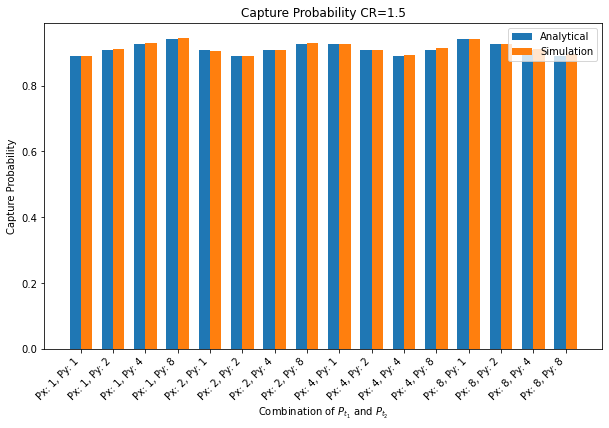

In [14]:
# Extract values
Px_values = [entry[0] for entry in draw_ana[0]]
Py_values = [entry[1] for entry in draw_ana[0]]
result_values_ana = [entry[2] for entry in draw_ana[0]]
result_values_simu = [entry[2] for entry in draw_simu[0]]

# Set the positions for the bars
x = np.arange(len(result_values_ana))

# Set the width of the bars
width = 0.35

# Create the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, result_values_ana, width, label='Analytical')
plt.bar(x + width/2, result_values_simu, width, label='Simulation')
plt.xlabel('Combination of $P_{t_1}$ and $P_{t_2}$')
plt.ylabel('Capture Probability')
plt.title('Capture Probability CR=1.5')
plt.xticks(x, [f'Px: {Px}, Py: {Py}' for Px, Py in zip(Px_values, Py_values)], rotation=45, ha="right")
plt.legend()
plt.show()

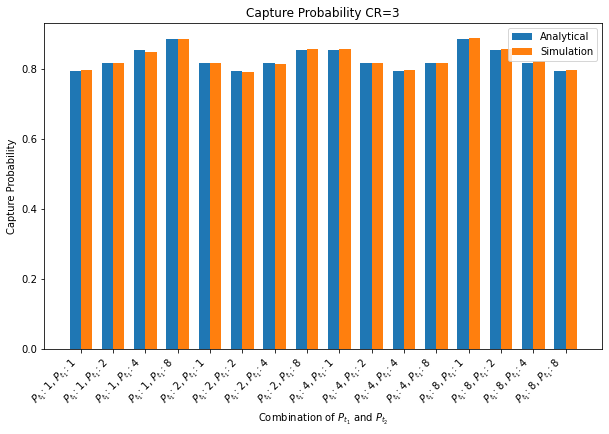

In [15]:
# Extract values
Px_values = [entry[0] for entry in draw_ana[1]]
Py_values = [entry[1] for entry in draw_ana[1]]
result_values_ana = [entry[2] for entry in draw_ana[1]]
result_values_simu = [entry[2] for entry in draw_simu[1]]

# Set the positions for the bars
x = np.arange(len(result_values_ana))

# Set the width of the bars
width = 0.35

# Create the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, result_values_ana, width, label='Analytical')
plt.bar(x + width/2, result_values_simu, width, label='Simulation')
plt.xlabel('Combination of $P_{t_1}$ and $P_{t_2}$')
plt.ylabel('Capture Probability')
plt.title('Capture Probability CR=3')
plt.xticks(x, [f'$P_{{t_1}}$: {Px}, $P_{{t_1}}$: {Py}' for Px, Py in zip(Px_values, Py_values)], rotation=45, ha="right")
plt.legend()
plt.show()

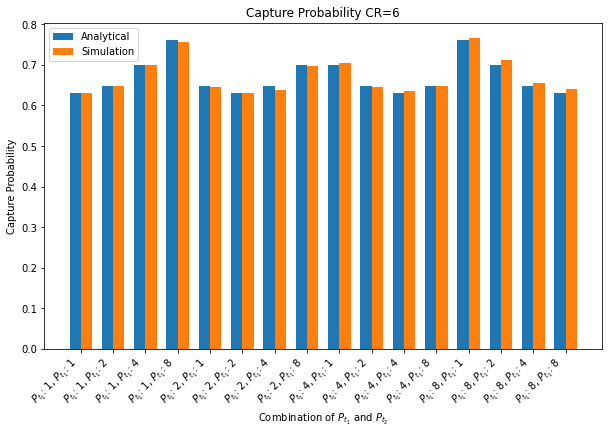

In [16]:
# Extract values
Px_values = [entry[0] for entry in draw_ana[2]]
Py_values = [entry[1] for entry in draw_ana[2]]
result_values_ana = [entry[2] for entry in draw_ana[2]]
result_values_simu = [entry[2] for entry in draw_simu[2]]

# Set the positions for the bars
x = np.arange(len(result_values_ana))

# Set the width of the bars
width = 0.35

# Create the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, result_values_ana, width, label='Analytical')
plt.bar(x + width/2, result_values_simu, width, label='Simulation')
plt.xlabel('Combination of $P_{t_1}$ and $P_{t_2}$')
plt.ylabel('Capture Probability')
plt.title('Capture Probability CR=6')
plt.xticks(x, [f'$P_{{t_1}}$: {Px}, $P_{{t_1}}$: {Py}' for Px, Py in zip(Px_values, Py_values)], rotation=45, ha="right")
plt.legend()
plt.show()